<a href="https://colab.research.google.com/github/abhirajtiwari/rock_paper_scissor/blob/master/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Paper Scissor using deeplearning
This notebook has code for implementing a deeplearning model to identify rock, paper or scissor for a classic game.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
print(tf.__version__)

2.2.0


So I plan on doing transfer learning by training a classifier on the minst SIGNS dataset and then using that classifier to train further on the rock paper scissor data base.

I'm gonna try a custom cnn architecture, some standard cnn architecture and some cnn that is light like mobile net to finally deploy it as an app.

#### Extracting the dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-02 16:04:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 64.233.166.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  74.7MB/s    in 2.6s    

2020-07-02 16:04:47 (74.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-02 16:04:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [ ]:
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

## Loading the dataset

In [ ]:
root = '/tmp/'

Shape: (300, 300, 4)


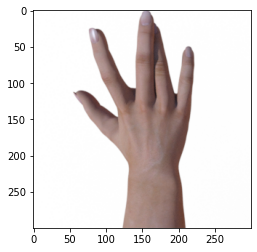

In [ ]:
example = np.asarray(Image.open(root + "rps/paper/paper01-000.png"))
print("Shape: " + str(example.shape))
plt.imshow(example)

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=45, zoom_range=0.2)

train_generator = train_gen.flow_from_directory(root + "rps", batch_size=32, target_size=(150, 150), color_mode='grayscale', shuffle=True, class_mode='categorical')

Found 2520 images belonging to 3 classes.


In [ ]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = train_gen.flow_from_directory(root + "rps-test-set", batch_size=32, target_size=(150, 150), color_mode='grayscale', shuffle=True, class_mode='categorical')

Found 372 images belonging to 3 classes.


## Custom Model

In [ ]:
cust_model = tf.keras.Sequential()
cust_model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 1)))
cust_model.add(layers.MaxPool2D((2, 2)))
cust_model.add(layers.Dropout(0.4))
cust_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cust_model.add(layers.MaxPool2D((2, 2)))
cust_model.add(layers.Flatten())
cust_model.add(layers.Dropout(0.8))
cust_model.add(layers.Dense(64, activation='relu'))
cust_model.add(layers.Dropout(0.6))
cust_model.add(layers.Dense(3, activation='softmax'))

cust_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])
cust_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 39200)             0

In [ ]:
cust_history = cust_model.fit(train_generator, epochs=25, verbose=1, validation_data=test_generator)

Epoch 1/25
79/79 [==============================] - 13s 165ms/step - loss: 1.1618 - acc: 0.3536 - val_loss: 1.0980 - val_acc: 0.3710
Epoch 2/25
79/79 [==============================] - 13s 163ms/step - loss: 1.0866 - acc: 0.3893 - val_loss: 1.0862 - val_acc: 0.3898
Epoch 3/25
79/79 [==============================] - 13s 160ms/step - loss: 0.9754 - acc: 0.4984 - val_loss: 0.8493 - val_acc: 0.7097
Epoch 4/25
79/79 [==============================] - 13s 160ms/step - loss: 0.8163 - acc: 0.6067 - val_loss: 0.6922 - val_acc: 0.7796
Epoch 5/25
79/79 [==============================] - 13s 159ms/step - loss: 0.7152 - acc: 0.6571 - val_loss: 0.6827 - val_acc: 0.7231
Epoch 6/25
79/79 [==============================] - 13s 159ms/step - loss: 0.6594 - acc: 0.6980 - val_loss: 0.5484 - val_acc: 0.7876
Epoch 7/25
79/79 [==============================] - 13s 159ms/step - loss: 0.6218 - acc: 0.7190 - val_loss: 0.4559 - val_acc: 0.8414
Epoch 8/25
79/79 [==============================] - 13s 164ms/step - 

KeyboardInterrupt: ignored

In [ ]:
def plot_history(hist):
  # summarize history for accuracy
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('model acc')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
plot_history(cust_history)

## Transfer learning

In [ ]:
train_gen_mobnet = train_gen.flow_from_directory(root + "rps", batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical')
test_gen_mobnet = train_gen.flow_from_directory(root + "rps-test-set", batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical') 

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
mob_v2_base = tf.keras.applications.MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')
mob_v2_base.trainable=False
mob_v2_rps = tf.keras.Sequential([
                                  mob_v2_base,
                                  layers.GlobalAveragePooling2D(),
                                  #layers.Dropout(0.4),
                                  layers.Dense(3, activation='softmax')
                                ])
mob_v2_rps.summary()

9412608/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 10, 10, 1280)      2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
lr_scheduler = tf.keras.optimizers.schedules.InverseTimeDecay(0.001, 79*5, 1)
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# removed lr_scheduler
mob_v2_rps.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
mobnet_history = mob_v2_rps.fit(train_gen_mobnet, epochs=15, verbose=1, validation_data=test_gen_mobnet, callbacks=[es_cb])

Epoch 1/15
79/79 [==============================] - 27s 338ms/step - loss: 0.1865 - acc: 0.9381 - val_loss: 0.3318 - val_acc: 0.8817
Epoch 2/15
79/79 [==============================] - 26s 329ms/step - loss: 0.1247 - acc: 0.9603 - val_loss: 0.2871 - val_acc: 0.9032
Epoch 3/15
79/79 [==============================] - 26s 326ms/step - loss: 0.0876 - acc: 0.9746 - val_loss: 0.2134 - val_acc: 0.9220
Epoch 4/15
79/79 [==============================] - 26s 326ms/step - loss: 0.0743 - acc: 0.9746 - val_loss: 0.2317 - val_acc: 0.9301
Epoch 5/15
79/79 [==============================] - 26s 328ms/step - loss: 0.0565 - acc: 0.9825 - val_loss: 0.2026 - val_acc: 0.9435
Epoch 6/15
79/79 [==============================] - 26s 327ms/step - loss: 0.0515 - acc: 0.9833 - val_loss: 0.2682 - val_acc: 0.9005
Epoch 7/15
79/79 [==============================] - 26s 326ms/step - loss: 0.0508 - acc: 0.9845 - val_loss: 0.2204 - val_acc: 0.9140
Epoch 8/15
79/79 [==============================] - 26s 327ms/step - 

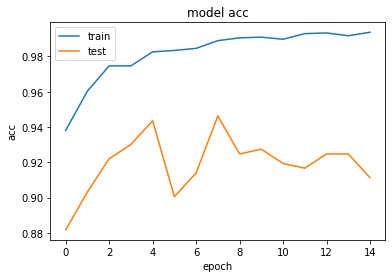

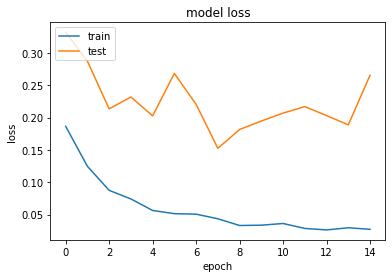

In [ ]:
plot_history(mobnet_history)

using custom dataset

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
mob_v2_rps = tf.keras.models.load_model('/gdrive/My Drive/rock_paper_scissor/mnv2_wo_dropout.h5')

In [ ]:
!mv /gdrive/My\ Drive/rock_paper_scissor/cust_image_data.zip /tmp/
local_zip = '/tmp/cust_image_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
!mv /tmp/cust_image_data/scissor /tmp/cust_image_data/scissors

In [ ]:
cust_ds_gen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, rotation_range=45, rescale=1./255, horizontal_flip=True, validation_split=0.1)
cust_ds_train_generator = cust_ds_gen.flow_from_directory(root + 'cust_image_data/' ,batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical', subset='training')
cust_ds_val_generator = cust_ds_gen.flow_from_directory(root + 'cust_image_data/' ,batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical', subset='validation')

Found 3780 images belonging to 3 classes.
Found 420 images belonging to 3 classes.


In [ ]:
mob_v2_rps.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.003), metrics=['acc'])
hist_mobv2_custds = mob_v2_rps.fit(cust_ds_train_generator, epochs=100, verbose=1, validation_data=cust_ds_val_generator, callbacks=[es_cb])

Epoch 1/100
119/119 [==============================] - 26s 219ms/step - loss: 0.4684 - acc: 0.8267 - val_loss: 0.1466 - val_acc: 0.9667
Epoch 2/100
119/119 [==============================] - 25s 214ms/step - loss: 0.2035 - acc: 0.9307 - val_loss: 0.1904 - val_acc: 0.9262
Epoch 3/100
119/119 [==============================] - 25s 212ms/step - loss: 0.1545 - acc: 0.9463 - val_loss: 0.0758 - val_acc: 0.9857
Epoch 4/100
119/119 [==============================] - 25s 212ms/step - loss: 0.1458 - acc: 0.9505 - val_loss: 0.0822 - val_acc: 0.9762
Epoch 5/100
119/119 [==============================] - 25s 213ms/step - loss: 0.1195 - acc: 0.9630 - val_loss: 0.0990 - val_acc: 0.9667
Epoch 6/100
119/119 [==============================] - 25s 213ms/step - loss: 0.1299 - acc: 0.9519 - val_loss: 0.0578 - val_acc: 0.9857
Epoch 7/100
119/119 [==============================] - 25s 213ms/step - loss: 0.1089 - acc: 0.9601 - val_loss: 0.0653 - val_acc: 0.9833
Epoch 8/100
  3/119 [...........................

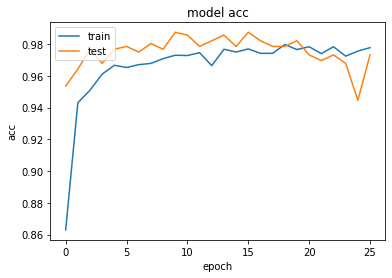

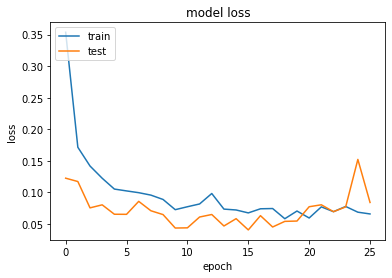

In [ ]:
plot_history(hist_mobv2_custds)

In [ ]:
mob_v2_rps.save('/gdrive/My Drive/rock_paper_scissor/mnv2_wo_dropout.h5')
mob_v2_rps.save_weights('/gdrive/My Drive/rock_paper_scissor/checkpts/mnv2_wo_dropout.h5')

## Prediction using an example from webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image as ipython_Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(ipython_Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Shape: (1, 300, 300, 3)


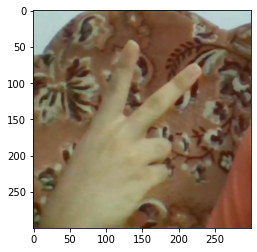

In [ ]:
from PIL import Image
example_image = np.asarray(Image.open("photo.jpg"))
example_image = example_image[180:480, 0:300, :]
example_image = example_image/255.
example_image = np.array([example_image[:,:,0:3]])
print("Shape: " + str(example_image.shape))
plt.imshow(example_image[0])

In [ ]:
print(train_gen_mobnet.class_indices)
print(np.argmax(mob_v2_rps.predict(example_image), axis=-1))

{'paper': 0, 'rock': 1, 'scissors': 2}
[2]
